In [ ]:
import plotly.express as px
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#📌 Extracción

In [ ]:
url_data = "/content/drive/MyDrive/Alura/Challenge_18_agosto_ETL(2do)/TelecomX_Data.json"
df = pd.read_json(url_data)

In [ ]:
normalize_customer = pd.json_normalize(df['customer'])
normalize_phone = pd.json_normalize(df['phone'])
normalize_internet = pd.json_normalize(df['internet'])
normalize_account = pd.json_normalize(df['account'])

In [ ]:
df = df.drop(['customer', 'phone', 'internet', 'account'],axis = 1)
df = pd.concat([df, normalize_customer, normalize_phone, normalize_internet, normalize_account], axis=1)

#🔧 Transformación

##Arreglar datos

In [ ]:
df["Churn"] = df["Churn"].replace({"Yes":1, "No": 0}).replace(r'^\s*$', np.nan, regex=True)
df["Partner"] = df["Partner"].replace({"Yes":1, "No": 0})
df["Dependents"] = df["Dependents"].replace({"Yes":1, "No": 0})
df["PhoneService"] = df["PhoneService"].replace({"Yes":1, "No": 0})
df["MultipleLines"] = df["MultipleLines"].replace({"Yes":1, "No": 0}).replace("No phone service", np.nan)
df["OnlineSecurity"] = df["OnlineSecurity"].replace({"Yes":1, "No": 0}).replace("No internet service", np.nan)
df["OnlineBackup"] = df["OnlineBackup"].replace({"Yes":1, "No": 0}).replace("No internet service", np.nan)
df["DeviceProtection"] = df["DeviceProtection"].replace({"Yes":1, "No": 0}).replace("No internet service", np.nan)
df["TechSupport"] = df["TechSupport"].replace({"Yes":1, "No": 0}).replace("No internet service", np.nan)
df["StreamingTV"] = df["StreamingTV"].replace({"Yes":1, "No": 0}).replace("No internet service", np.nan)
df["StreamingMovies"] = df["StreamingMovies"].replace({"Yes":1, "No": 0})
df["PaperlessBilling"] = df["PaperlessBilling"].replace({"Yes":1, "No": 0})
df["Charges.Monthly"] = df["Charges.Monthly"].astype(np.float64)
df["Charges.Total"] = df["Charges.Total"].replace(' ', 0)
df["Charges.Total"] = df["Charges.Total"].astype(np.float64)

/tmp/ipython-input-5-2509857408.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Churn"] = df["Churn"].replace({"Yes":1, "No": 0}).replace(r'^\s*$', np.nan, regex=True)
/tmp/ipython-input-5-2509857408.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Partner"] = df["Partner"].replace({"Yes":1, "No": 0})
/tmp/ipython-input-5-2509857408.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False

In [ ]:
df["PaperlessBilling"] = df["PaperlessBilling"].replace({"Yes":1, "No": 0, "No internet service" :0})

##Agregar "Cuentas_Diarias"

In [ ]:
df["Cuentas_Diarias"] = df["Charges.Monthly"] / 30

##Renombrar columnas

In [ ]:
df = df.rename(columns={"Churn":"permanencia", "gender":"genero", "SeniorCitizen" :"anciano", "Partner":"casado", "Dependents": "dependientes", "tenure":"mesesContrato"})
df= df.rename(columns={"PhoneService":"servicioTeléfono", "MultipleLines":"lineasMutiples", "InternetService":"servicioInternet", "OnlineSecurity":"seguridadEnLinea"})

In [ ]:
df = df.rename(columns ={"OnlineBackup": "respaldoEnLinea","DeviceProtection": "proteccionDispositivo", "TechSupport": "soporteTecnico", "StreamingTV" :"cableTelevision", "StreamingMovies": "streamingPeliculas", "Contract": "tipoContrato", "PaperlessBilling" : "facturaEnLinea", "formaDePago": "formaDePago", "Charges.Monthly":"cargosMensuales", "Charges.Total": "cargosTotales", "PaymentMethod" : "metododepago"})

#📊 Carga y análisis

##Métricas

In [ ]:
df.describe().loc[["count", "mean", "std"]]

,permanencia,anciano,casado,dependientes,mesesContrato,servicioTeléfono,lineasMutiples,seguridadEnLinea,respaldoEnLinea,proteccionDispositivo,soporteTecnico,cableTelevision,facturaEnLinea,cargosMensuales,cargosTotales,Cuentas_Diarias
count,7043.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,6560.000000,5686.000000,5686.000000,5686.000000,5686.000000,5686.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.265370,0.162653,0.484106,0.300124,32.346498,0.902711,0.467226,0.365459,0.440380,0.438094,0.370032,0.490679,0.593230,64.720098,2277.182035,2.157337
std,0.441561,0.369074,0.499782,0.458343,24.571773,0.296371,0.498963,0.481601,0.496476,0.496196,0.482855,0.499957,0.491265,30.129572,2268.648587,1.004319


##Grafico de barras para permanencia

In [ ]:
df_permanencia = df["permanencia"].value_counts().reset_index()
df_permanencia.columns =  ['Valor', 'Cantidad']

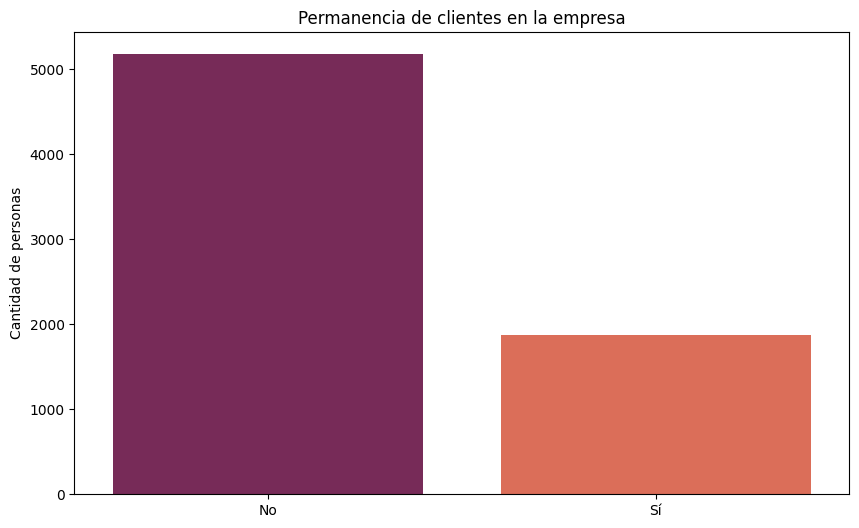

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.barplot(data = df_permanencia, x= "Valor", y = "Cantidad", hue="Valor", palette="rocket", legend=False)
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(["No", "Sí"])
ax.set_title("Permanencia de clientes en la empresa")
ax.set_xlabel("")
ax.set_ylabel("Cantidad de personas")
plt.show()

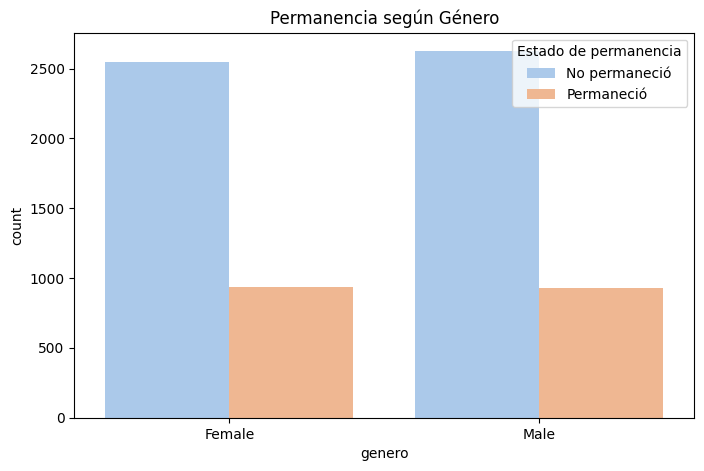

In [ ]:

fig, ag = plt.subplots(figsize=(8, 5))
sns.countplot(data=df, x="genero", hue="permanencia", palette="pastel")

ag.legend(title="Estado de permanencia")

ag.legend_.texts[0].set_text("No permaneció")
ag.legend_.texts[1].set_text("Permaneció")

plt.title("Permanencia según Género")
plt.show()


/tmp/ipython-input-14-2833006420.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ac.set_xticklabels(["One year", 'Month-to-month', "Year-to-year" ])


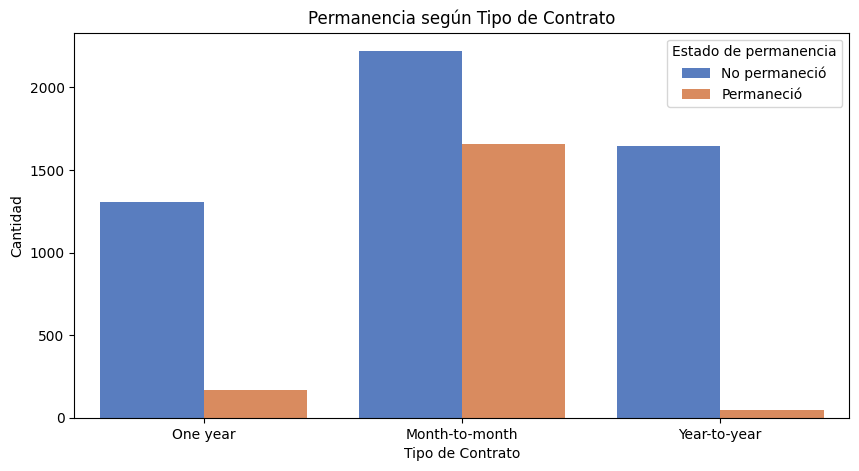

In [ ]:
fig, ac = plt.subplots(figsize=(10, 5))
sns.countplot(data=df, x="tipoContrato", hue="permanencia", palette="muted")
ac.set_title("Permanencia según Tipo de Contrato")
ac.set_xlabel("Tipo de Contrato")
ac.set_ylabel("Cantidad")
ac.set_xticklabels(["One year", 'Month-to-month', "Year-to-year" ])

ac.legend(title="Estado de permanencia")

ac.legend_.texts[0].set_text("No permaneció")
ac.legend_.texts[1].set_text("Permaneció")
plt.show()


/tmp/ipython-input-15-1422309049.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  am.set_xticklabels(["Cheque por correo", "Cheque electrónico", "Tarjeta de crédito (automático)", "Transferencia bancaria (automático)"], rotation = 10)


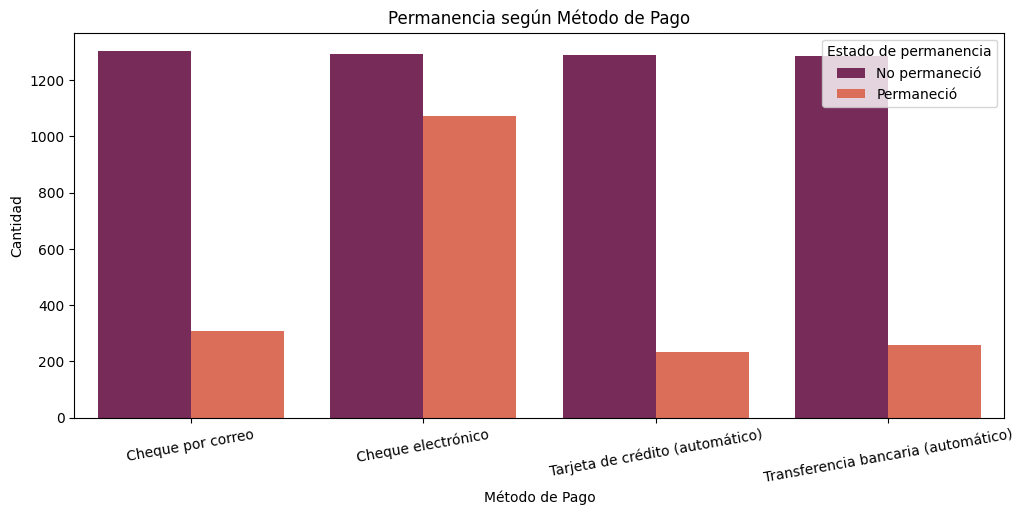

In [ ]:
fig, am = plt.subplots(figsize=(12, 5))
sns.countplot(data=df, x="metododepago", hue="permanencia", palette="rocket", ax=am)

am.set_title("Permanencia según Método de Pago")
am.set_xlabel("Método de Pago")
am.set_ylabel("Cantidad")
am.set_xticklabels(["Cheque por correo", "Cheque electrónico", "Tarjeta de crédito (automático)", "Transferencia bancaria (automático)"], rotation = 10)

am.legend(title="Estado de permanencia")

am.legend_.texts[0].set_text("No permaneció")
am.legend_.texts[1].set_text("Permaneció")
plt.show()


##Variables numéricas

In [ ]:
df_variables_numericas = df[["permanencia", "mesesContrato", "cargosTotales"]].sort_values(by="mesesContrato", ascending=True)

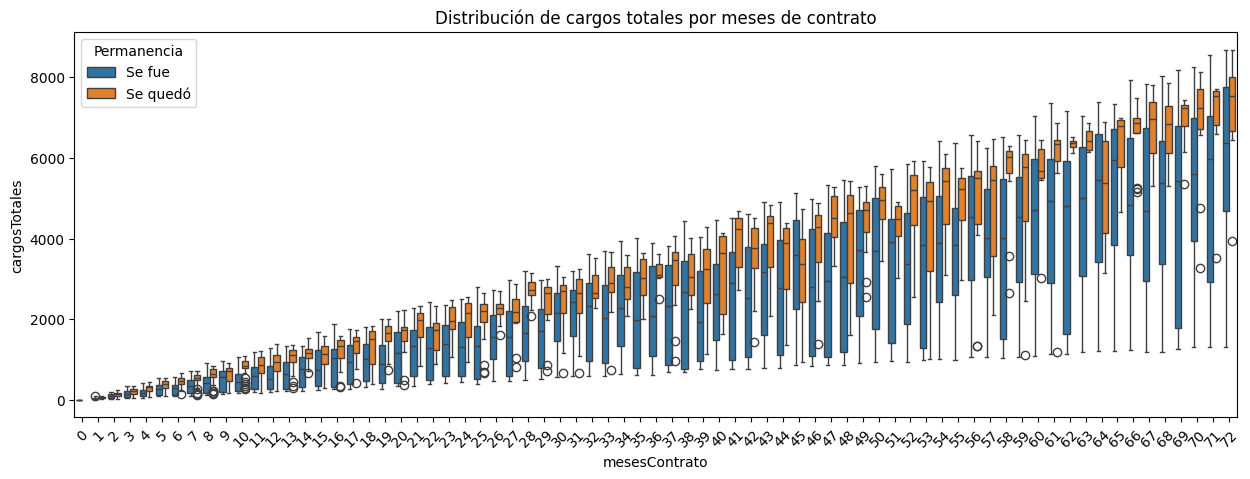

In [ ]:

df_plot = df_variables_numericas.copy()
df_plot["permanencia"] = df_plot["permanencia"].replace({0: "Se fue", 1: "Se quedó"})

plt.figure(figsize=(15, 5))
sns.boxplot(data=df_plot, x="mesesContrato", y="cargosTotales", hue="permanencia")
plt.xticks(rotation=45)
plt.title("Distribución de cargos totales por meses de contrato")
plt.legend(title="Permanencia")
plt.show()



In [ ]:
fig = px.line(df_variables_numericas, x = "mesesContrato", y = "cargosTotales", color = "permanencia", markers = True)
fig.update_layout(width =1500)
fig.show()

#📄Informe final

##Introducción
El presente informe fue realizado para poder comprender la razón de la pérdida de clientes de la empresa. A través del análisis de datos y la creación de métodos orientados a la comprensión de la problemática planteada.

##Limpieza y tratamiento de datos
Los datos se conviertieron a dataframe a través de pandas, se renombraron casi todas las columnas que categorizaban los datos para así tener un mejor entendimiento del dataframe, se eliminaron o reemplazaron caracteres que habían comprometido la integridad y la natureleeza de algunas datos y se agregó la columna "Cuentas_diarias" para poder complementar el dataframe con una nueva variable para lograr una mejor interpretación de los datos.


##Análisis exploratorio de los datos

Los anaálisis a los datos que  se desarrollaron fueron:

- Número de clientes que aún permanencen en la empresa.
- Número de clientes que aún permanencen en la empresa según su método de pago.
- Número de clientes que aún permanencen en la empresa según su género.
- Número de clientes que aún permanencen en la empresa según su tipo de contrato.
- Número de clientes que aún permanencen en la empresa según el tiempo de contrato y los cargos.

##Conclusiones e insights


Según el análisis de datos, se pudo descubrir que los clientes que permanecen por más tiempo en la compañía son aquellos que utilizan el método de pago mediante cheque electrónico. Además, se observó que el género de los clientes no influye en su permanencia pero el tipo de contrato sí, en términos generales, se evidenció que quienes tienen contratos de tipo mes a mes muestran un mayor compromiso con la compañía. Finalmente, la razón más frecuente de deserción identificada en el análisis fue el aumento de cargos a los clientes; a medida que pasaba el tiempo, los costos del servicio se incrementaban, lo que llevó a muchos a cancelar el contrato.

##Recomendaciones
Se recomienda iniciar un proceso de economización dentro de la empresa, de modo que una posible reducción en los cargos a los clientes no genere inconvenientes. Asimismo, es necesario aumentar la publicidad del contrato tipo mes a mes, con el objetivo de captar la atención de nuevos clientes potenciales. Finalmente, se sugiere facilitar aún más el uso del método de pago mediante cheque electrónico.